In [80]:
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [81]:
data =pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [82]:
data.shape

(1470, 35)

In [83]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [84]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**preprocessing of dataset**

In [86]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [87]:
data['Age'].value_counts()

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

**create new label for Age into age_group of (18-25),(26-35),(36-45),(46-60)**

In [88]:
data['age_group'] = pd.cut(data['Age'], bins = [18, 25, 35, 45, 60], include_lowest = True, labels = ['18-25', '26-35', '36-45', '46-60'])

In [89]:
data['age_group'] .value_counts()

26-35    606
36-45    468
46-60    273
18-25    123
Name: age_group, dtype: int64

In [90]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_group
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,36-45
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,46-60
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,36-45
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,26-35
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,26-35


In [91]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'age_group'],
      dtype='object')

In [92]:
data['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [93]:
data['DailyRate'].value_counts()

691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64

In [94]:
data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [95]:
data['DistanceFromHome'].value_counts()

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64

**create new label for distance from home into group of km(1-10),(11-20),(21-30)**

In [96]:
data['distance_group'] = pd.cut(data['DistanceFromHome'], bins = [1, 11, 21, 30], include_lowest = True, labels = ['1-10', '11-20', '21-30'])

In [97]:
data['distance_group'].value_counts()

1-10     1055
11-20     229
21-30     186
Name: distance_group, dtype: int64

In [98]:
data['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [99]:
data['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [100]:
data['EmployeeCount']

0       1
1       1
2       1
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: EmployeeCount, Length: 1470, dtype: int64

In [101]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'age_group', 'distance_group'],
      dtype='object')

In [102]:
data['EmployeeNumber']

0          1
1          2
2          4
3          5
4          7
        ... 
1465    2061
1466    2062
1467    2064
1468    2065
1469    2068
Name: EmployeeNumber, Length: 1470, dtype: int64

In [103]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_group,distance_group
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,36-45,1-10
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,46-60,1-10
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,36-45,1-10
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,26-35,1-10
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,26-35,1-10


In [104]:
data['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [105]:
data['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [106]:
data['HourlyRate'].value_counts()

66    29
98    28
42    28
48    28
84    28
      ..
31    15
53    14
68    14
38    13
34    12
Name: HourlyRate, Length: 71, dtype: int64

In [107]:
data['HourlyRate']

0       94
1       61
2       92
3       56
4       40
        ..
1465    41
1466    42
1467    87
1468    63
1469    82
Name: HourlyRate, Length: 1470, dtype: int64

In [108]:
data['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [109]:
data['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [110]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'age_group', 'distance_group'],
      dtype='object')

In [111]:
data['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [112]:
data['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [113]:
data['MonthlyIncome'].value_counts()

2342     4
6142     3
2741     3
2559     3
2610     3
        ..
7104     1
2773     1
19513    1
3447     1
4404     1
Name: MonthlyIncome, Length: 1349, dtype: int64

In [114]:
data['MonthlyRate'].value_counts()

4223     3
9150     3
9558     2
12858    2
22074    2
        ..
14561    1
2671     1
5718     1
11757    1
10228    1
Name: MonthlyRate, Length: 1427, dtype: int64

In [115]:
data['NumCompaniesWorked'].value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

In [116]:
data['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

Over18 and Employeecount columns are dropped that's unnecessary columns

In [117]:
data.drop(columns='Over18', inplace=True)



In [118]:
data.drop(columns='EmployeeCount', inplace=True)

In [119]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'age_group', 'distance_group'],
      dtype='object')

In [120]:
data['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [121]:
data['PercentSalaryHike'].value_counts()

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64

create new label for percentsalary hike to group of (11%-15%),(16%-20%) and (21%-25%)

In [122]:
data['percentsalaryhike_group'] = pd.cut(data['PercentSalaryHike'], bins = [11, 16, 21, 25], include_lowest = True, labels = ['11-15', '16-20', '21-25'])

In [123]:
data['percentsalaryhike_group'].value_counts()

11-15    997
16-20    350
21-25    123
Name: percentsalaryhike_group, dtype: int64

In [124]:
data['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [125]:
data['RelationshipSatisfaction'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

In [126]:
data['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [127]:
data['StockOptionLevel'].value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

In [128]:
data['TotalWorkingYears']

0        8
1       10
2        7
3        8
4        6
        ..
1465    17
1466     9
1467     6
1468    17
1469     6
Name: TotalWorkingYears, Length: 1470, dtype: int64

In [129]:
data['TotalWorkingYears'].value_counts()

10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
2      31
14     31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
30      7
33      7
27      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64

In [130]:
data['TrainingTimesLastYear'].value_counts()

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

In [131]:
data['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [132]:
data['YearsAtCompany'].value_counts()

5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
34      1
30      1
Name: YearsAtCompany, dtype: int64

'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'

In [133]:
data['YearsInCurrentRole'].value_counts()

2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: YearsInCurrentRole, dtype: int64

In [134]:
data['YearsSinceLastPromotion'].value_counts()

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64

In [135]:
data['YearsWithCurrManager'].value_counts()

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
15      5
14      5
16      2
Name: YearsWithCurrManager, dtype: int64

UNIVARIATE PLOTS

In [136]:
cat = data.select_dtypes('object').columns.to_list()

In [137]:
cat

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

<ipython-input-138-a904b8a45a91>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition' , data=data ,palette='mako')


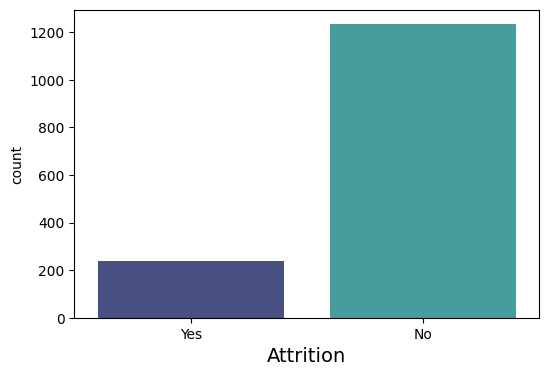

In [138]:
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition' , data=data ,palette='mako')
plt.xlabel('Attrition', fontsize=14)
plt.show()

<ipython-input-139-242ebcc2b768>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BusinessTravel' , data=data ,palette='mako')


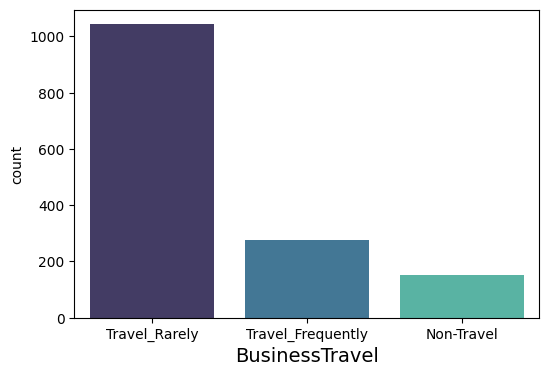

In [139]:
plt.figure(figsize=(6,4))
sns.countplot(x='BusinessTravel' , data=data ,palette='mako')
plt.xlabel('BusinessTravel', fontsize=14)
plt.show()

<ipython-input-140-dfc5c872816b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Department' , data=data ,palette='mako')


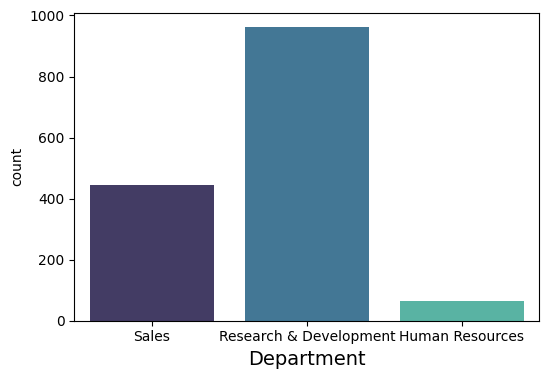

In [140]:
plt.figure(figsize=(6,4))
sns.countplot(x='Department' , data=data ,palette='mako')
plt.xlabel('Department', fontsize=14)
plt.show()

<ipython-input-141-bbf2694bc2e9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='OverTime' , data=data ,palette='mako')


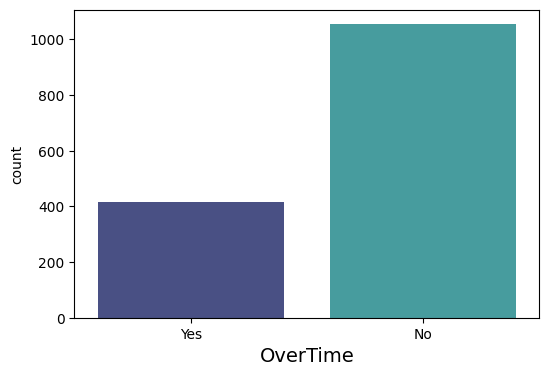

In [141]:
plt.figure(figsize=(6,4))
sns.countplot(x='OverTime' , data=data ,palette='mako')
plt.xlabel('OverTime', fontsize=14)
plt.show()

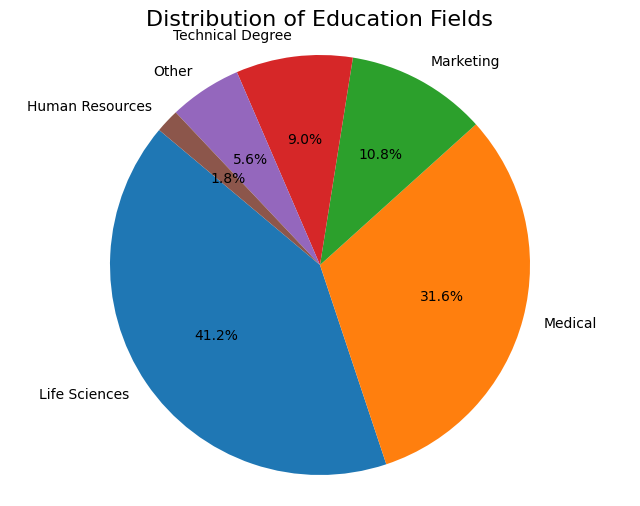

In [142]:
education_field_counts = data['EducationField'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(education_field_counts, labels=education_field_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Education Fields', fontsize=16)
plt.show()


<ipython-input-143-62e4186b9273>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='EducationField' , data=data ,palette='mako')


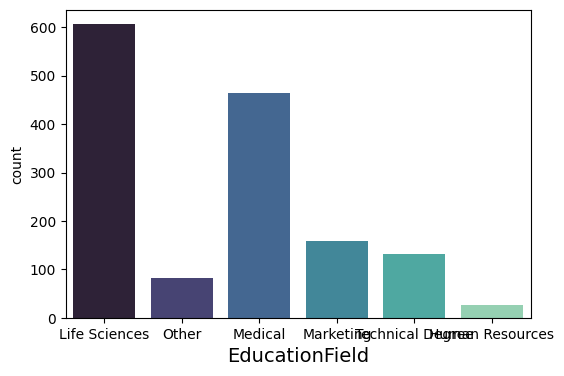

In [143]:
plt.figure(figsize=(6,4))
sns.countplot(x='EducationField' , data=data ,palette='mako')
plt.xlabel('EducationField', fontsize=14)
plt.show()

<ipython-input-144-aeba00c941cf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender' , data=data ,palette='mako')


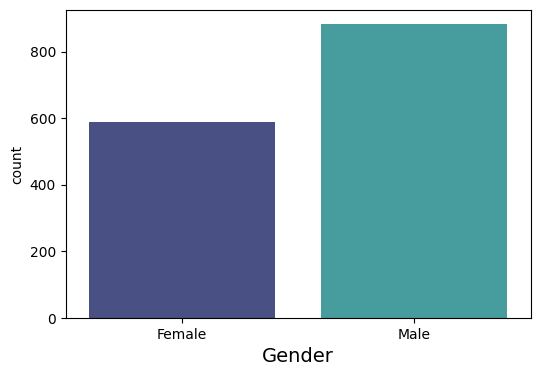

In [144]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender' , data=data ,palette='mako')
plt.xlabel('Gender', fontsize=14)
plt.show()

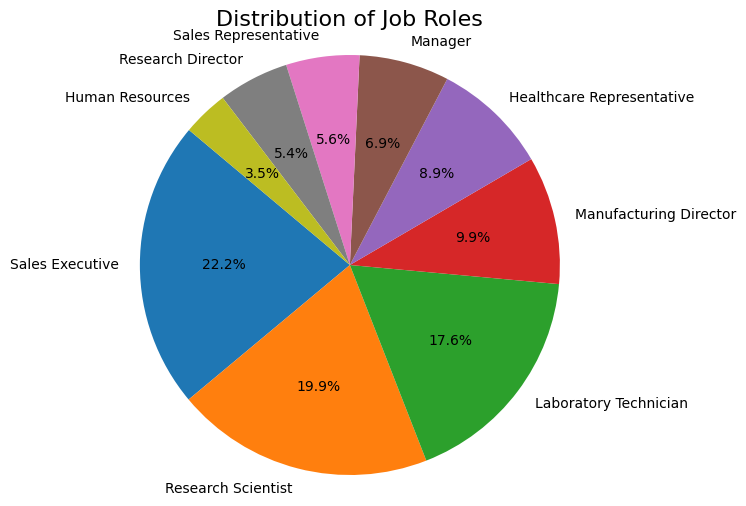

In [145]:
job_role_counts = data['JobRole'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(job_role_counts, labels=job_role_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.axis('equal')
plt.title('Distribution of Job Roles', fontsize=16)
plt.show()



<ipython-input-146-e9a104c29f56>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MaritalStatus' , data=data ,palette='mako')


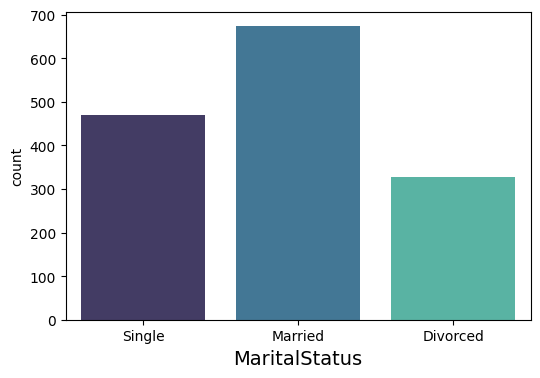

In [146]:
plt.figure(figsize=(6,4))
sns.countplot(x='MaritalStatus' , data=data ,palette='mako')
plt.xlabel('MaritalStatus', fontsize=14)
plt.show()

In [147]:
num = data.select_dtypes('number').columns.to_list()
num


['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

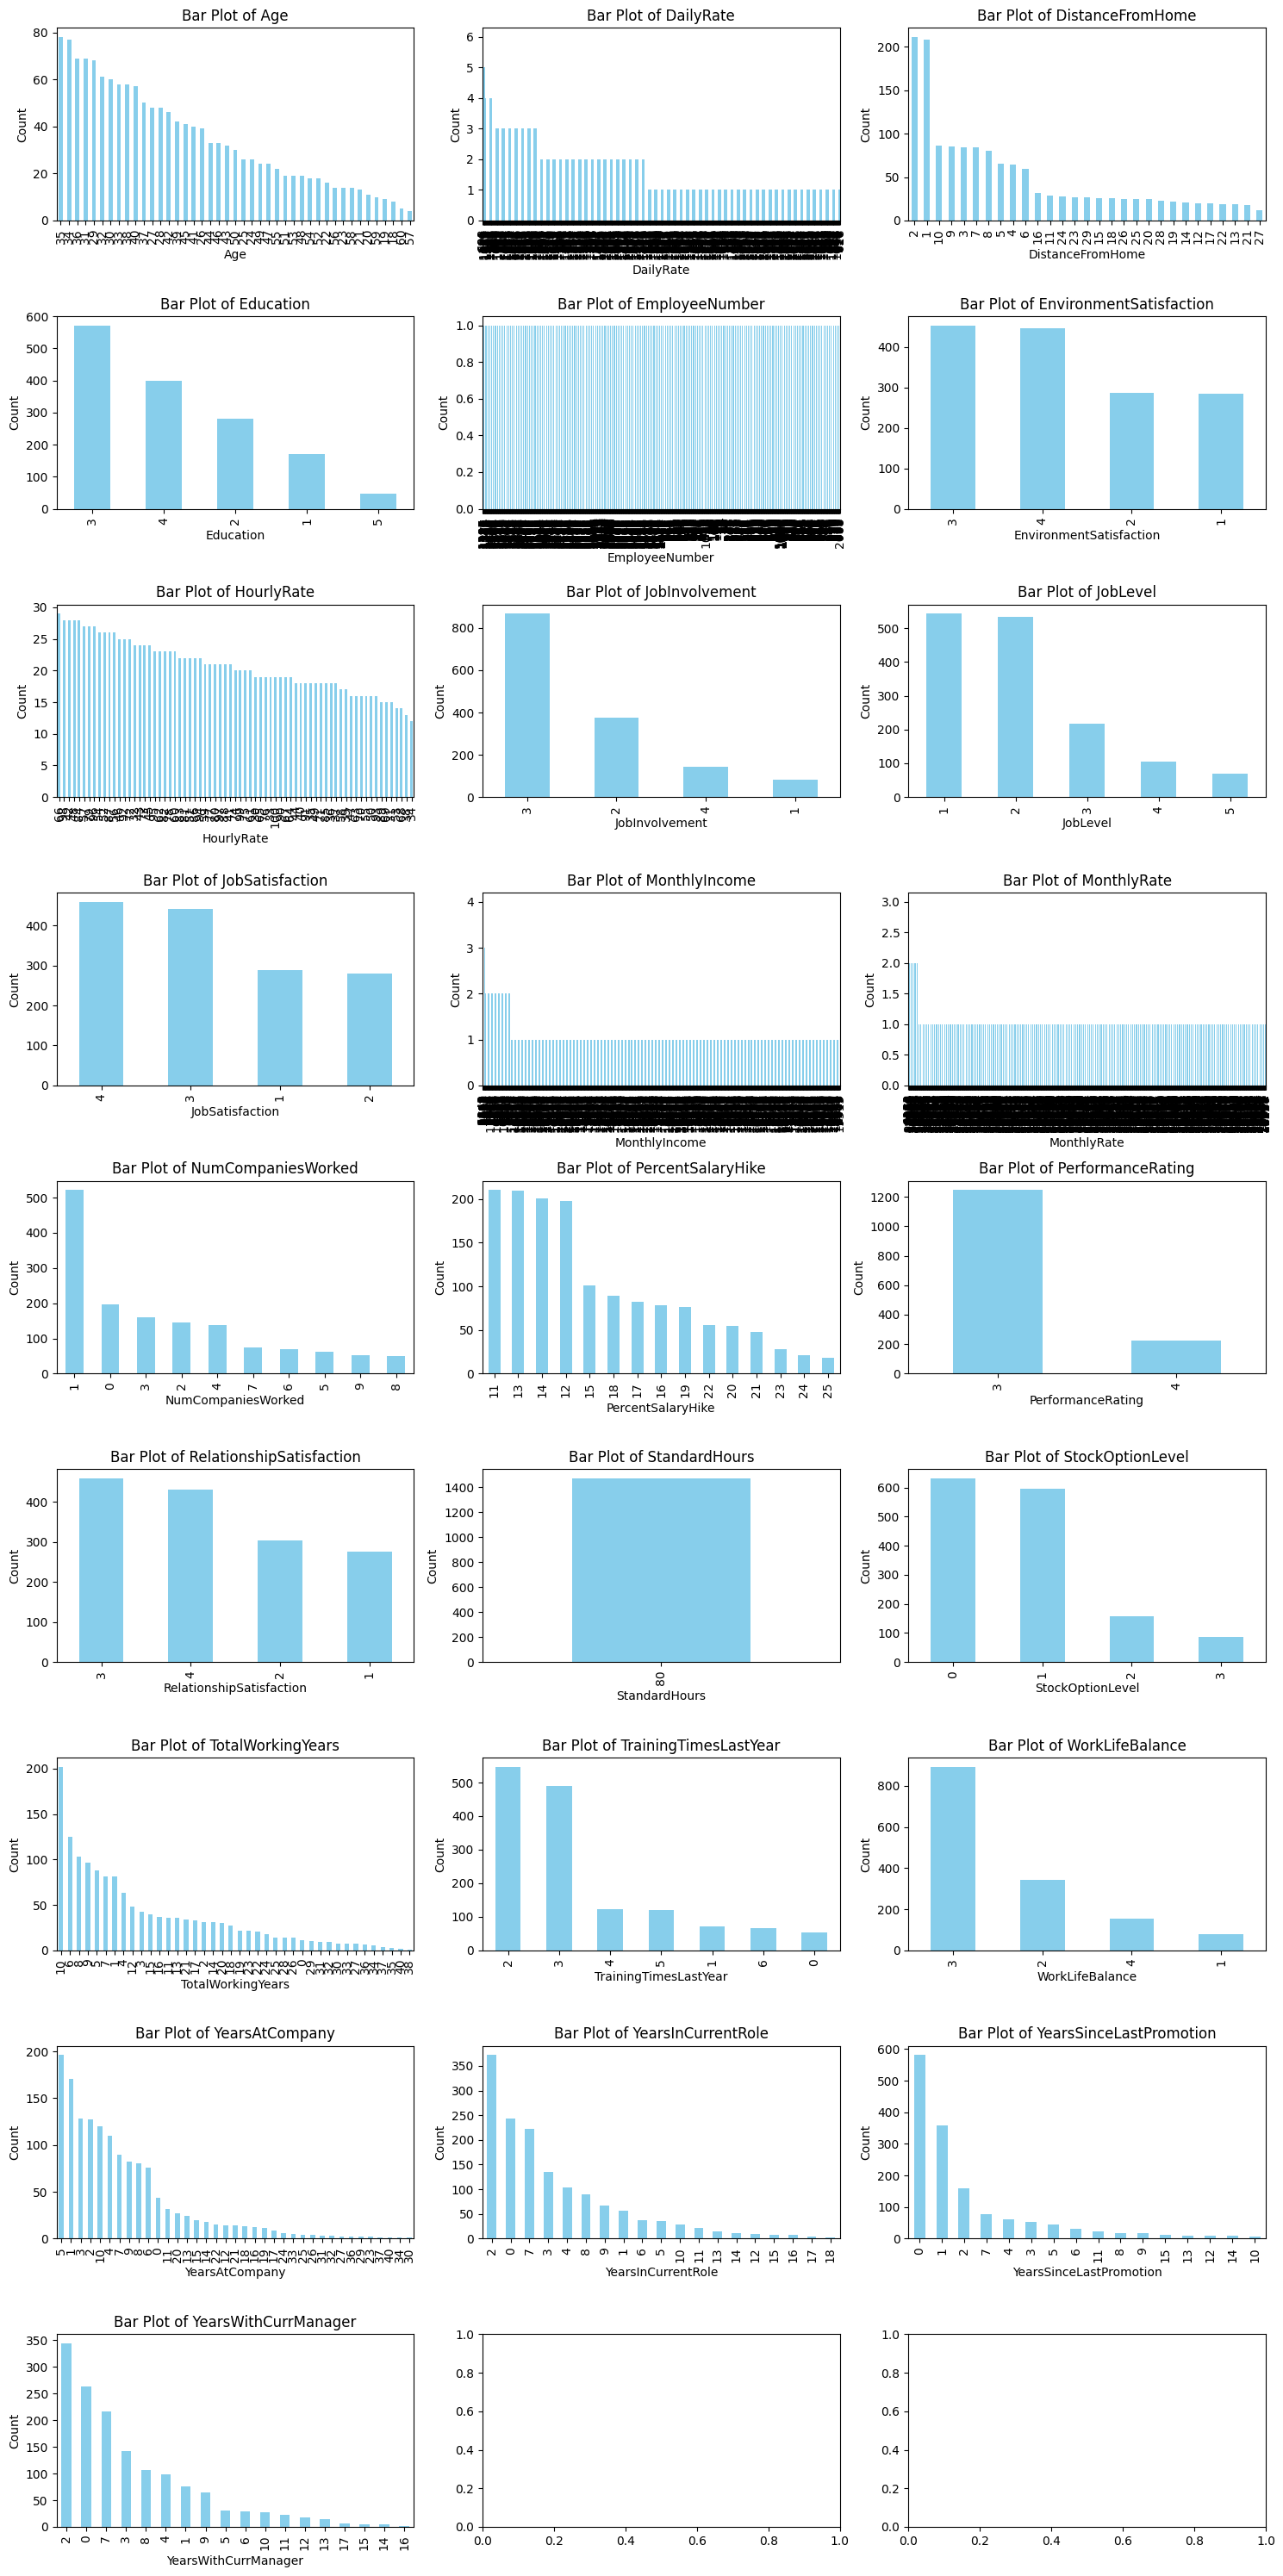

In [148]:
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
                      'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
                      'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                      'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
                      'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
                      'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
                      'YearsInCurrentRole', 'YearsSinceLastPromotion',
                      'YearsWithCurrManager']


num_cols = 3
num_rows = (len(numerical_features) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 30))


for i, feature in enumerate(numerical_features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]


    counts = data[feature].value_counts()

    # Plot bar plot
    counts.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'Bar Plot of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')


plt.tight_layout()
plt.show()


**Multivariate Plots using Box Plot**


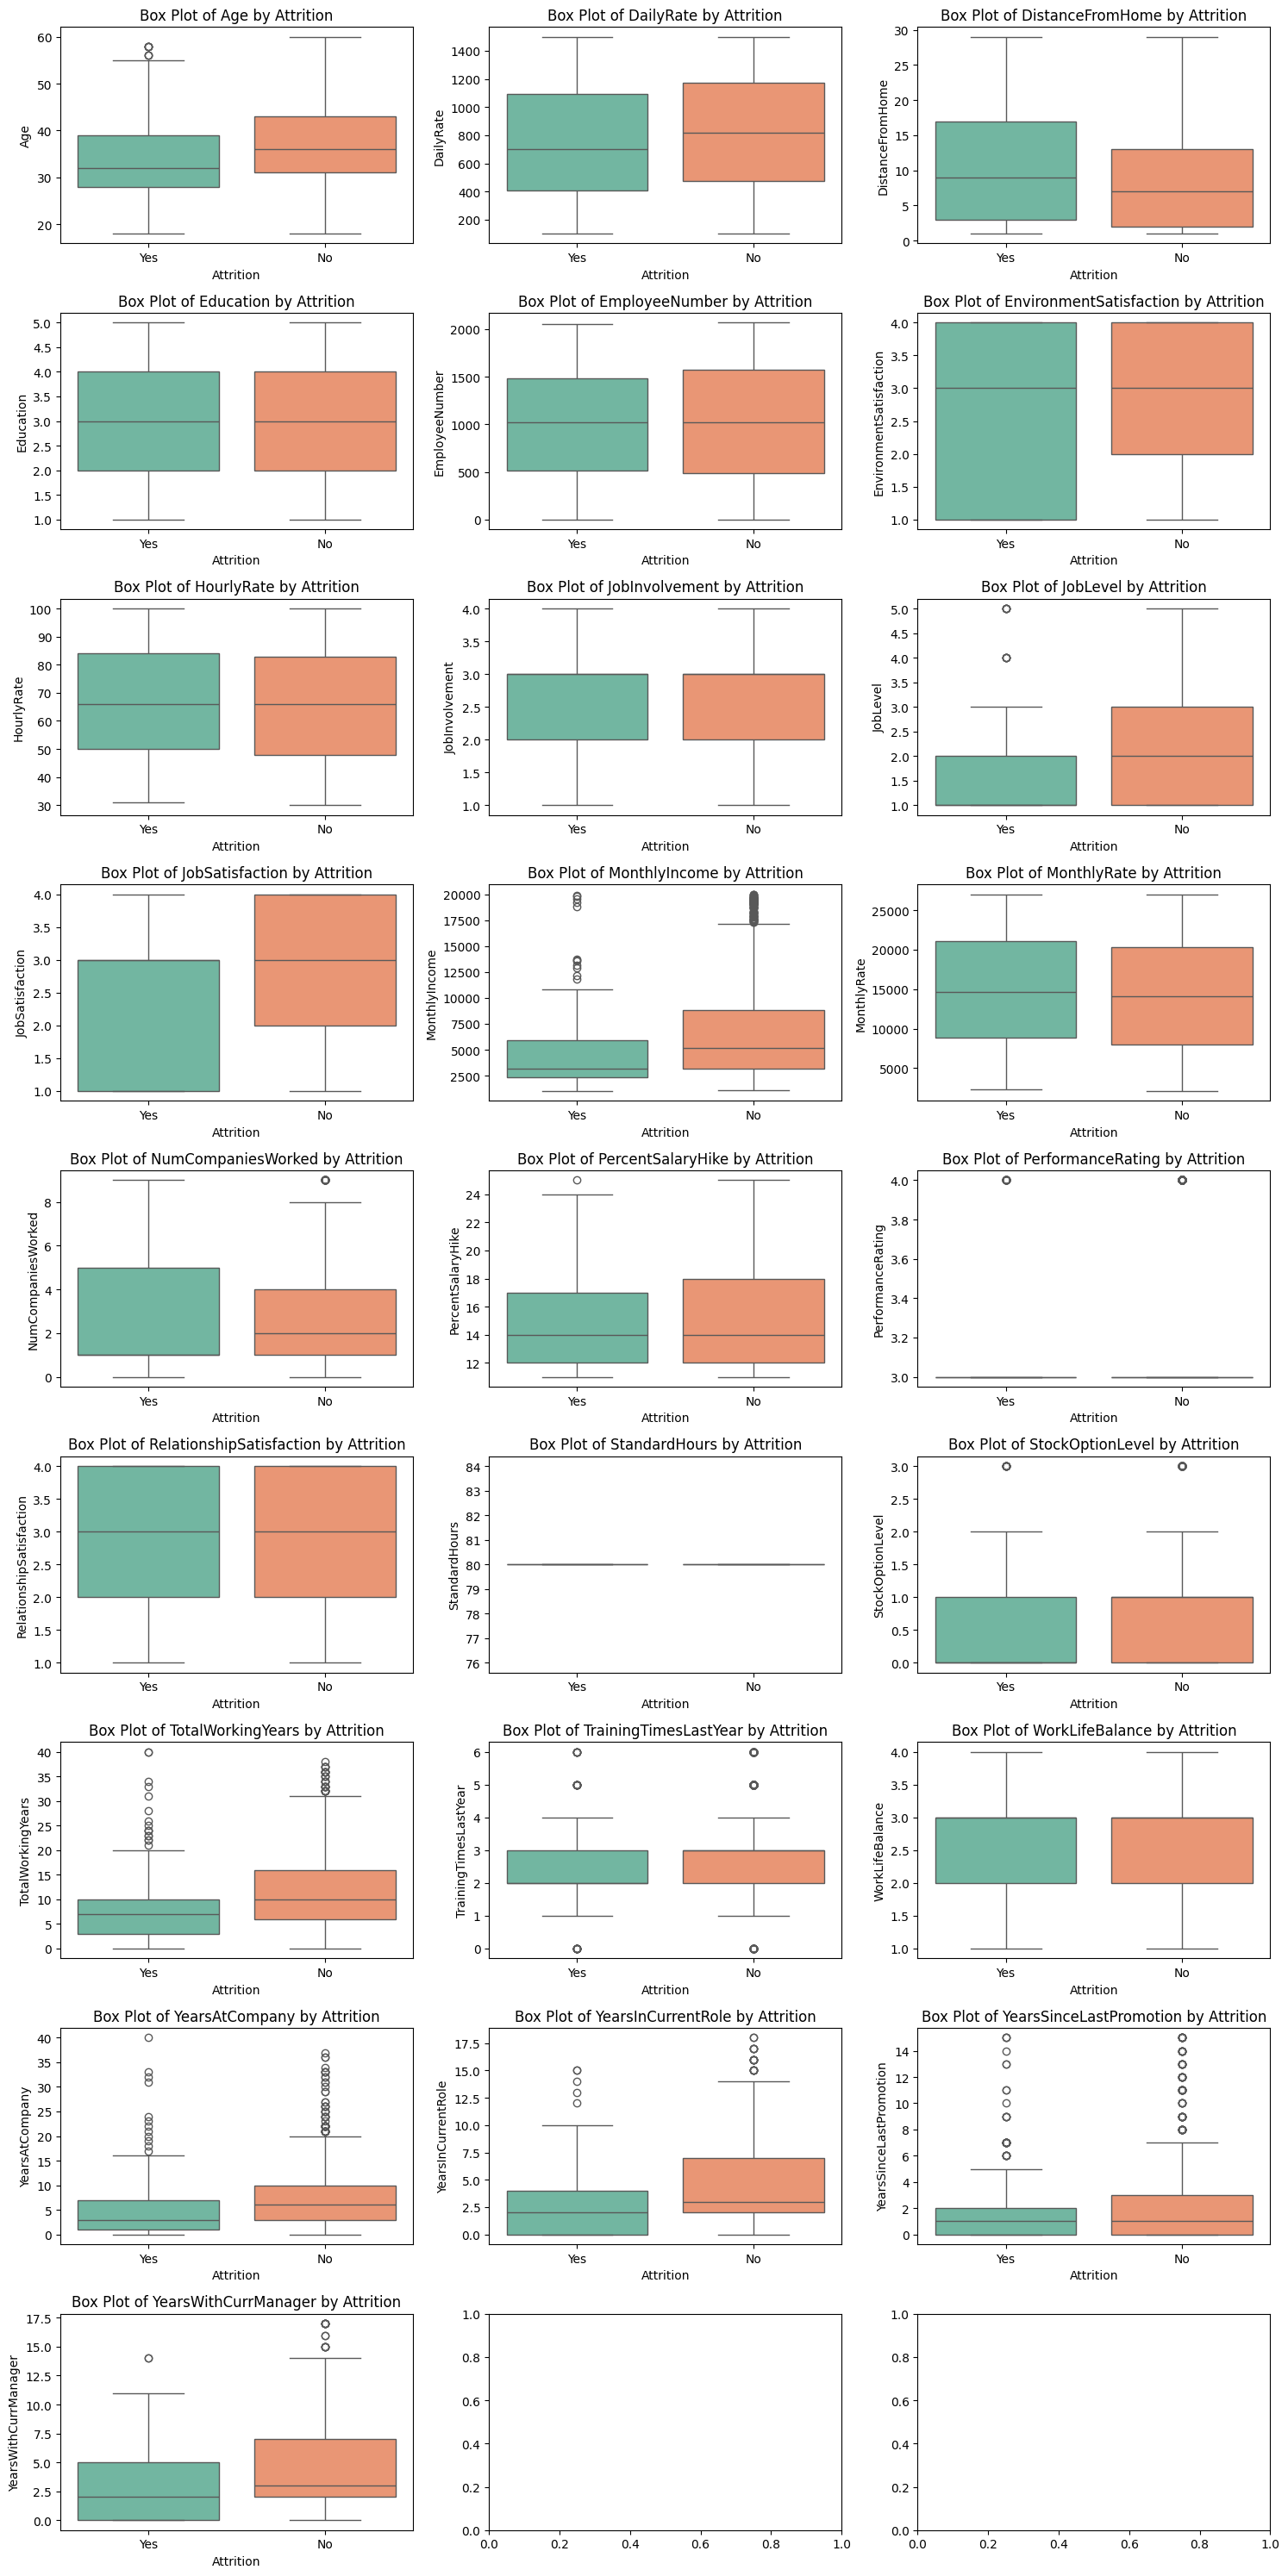

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing the input features and the output variable
# 'attrition' is your categorical output variable
# 'numerical_features' contains the names of numerical input features
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
                      'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
                      'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                      'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
                      'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
                      'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
                      'YearsInCurrentRole', 'YearsSinceLastPromotion',
                      'YearsWithCurrManager']

# Set custom color palette with just two colors
custom_palette = sns.color_palette("Set2", 2)  # You can replace "Set2" with any other palette name

# Set up the plotting grid
num_cols = 3  # Number of columns for subplots
num_rows = (len(numerical_features) + num_cols - 1) // num_cols  # Number of rows for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 30))  # Adjust figsize as needed

# Iterate through numerical features and create box plots
for i, feature in enumerate(numerical_features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    sns.boxplot(x='Attrition', y=feature, data=data, ax=ax, palette=custom_palette, hue='Attrition', legend=False)
    ax.set_title(f'Box Plot of {feature} by Attrition')
    ax.set_xlabel('Attrition')
    ax.set_ylabel(feature)

# Adjust layout
plt.tight_layout()
plt.show()



**Correlation Matrix**

<ipython-input-150-d3c0c629bf03>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


<Axes: >

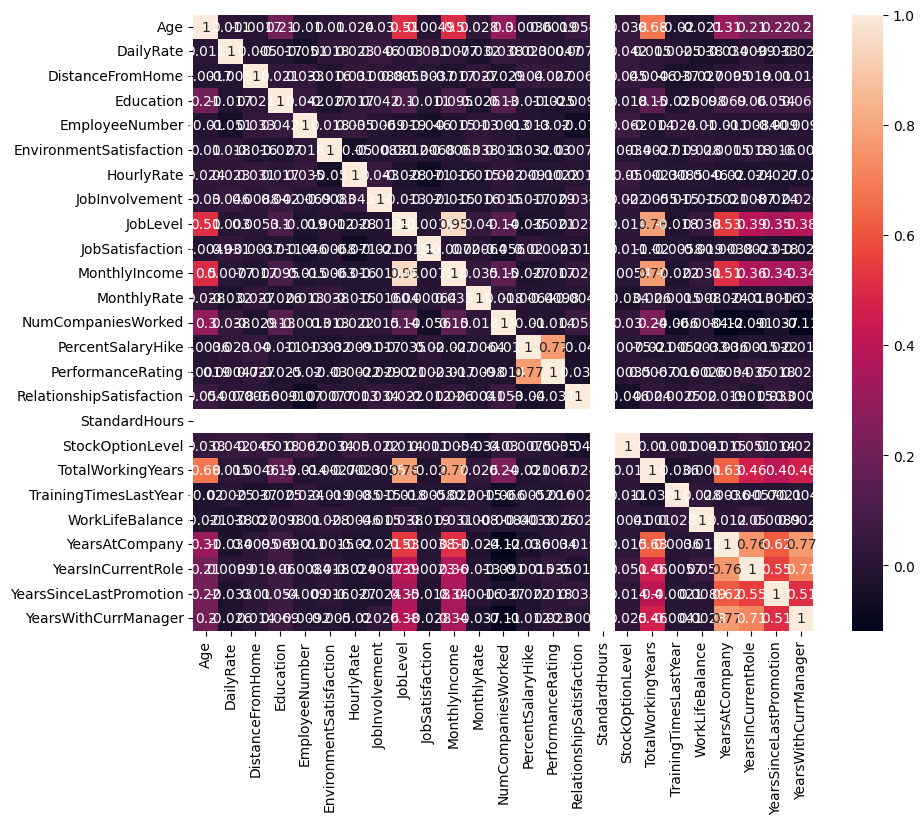

In [150]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot = True)


OneHotEncoding

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   object  
 2   BusinessTravel            1470 non-null   object  
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   object  
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   object  
 8   EmployeeNumber            1470 non-null   int64   
 9   EnvironmentSatisfaction   1470 non-null   int64   
 10  Gender                    1470 non-null   object  
 11  HourlyRate                1470 non-null   int64   
 12  JobInvolvement            1470 non-null   int64   
 13  JobLevel                  1470 non-null   int64 

In [152]:
# Specify columns to apply one-hot encoding
cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'age_group', 'distance_group', 'percentsalaryhike_group']

# Apply one-hot encoding
df_encoded = pd.get_dummies(data, columns=cols)

print("DataFrame after one-hot encoding:")
print(df_encoded)

DataFrame after one-hot encoding:
      Age  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
0      41       1102                 1          2               1   
1      49        279                 8          1               2   
2      37       1373                 2          2               4   
3      33       1392                 3          4               5   
4      27        591                 2          1               7   
...   ...        ...               ...        ...             ...   
1465   36        884                23          2            2061   
1466   39        613                 6          1            2062   
1467   27        155                 4          3            2064   
1468   49       1023                 2          3            2065   
1469   34        628                 8          3            2068   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                           2          94               3         

In [153]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 65 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EmployeeNumber                     1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyIncome                      1470 non-null   int64
 11  MonthlyRate                        1470 non-null   int64
 12  NumCompaniesWorked  